# Topic Models

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSSC_NLP/wine_reviews_small.xlsx')
len(df)

20000

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_cleaned
0,0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,tremendous varietal wine hail be age year oak ...
1,1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,ripe aroma fig blackberry cassis be soften swe...
2,2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,honor memory wine once make his mother tremend...
3,3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,spend month new french oak incorporate fruit v...
4,4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,be top wine name high point vineyard foot have...


Here is how the data was cleaned

In [ ]:
# import spacy
# nlp = spacy.load('en')
# def clean(text):
#     return ' '.join([token.lemma_ 
#             for token in nlp(text) 
#             if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'X'}])

In [ ]:
# remove empty entries
df = df[df['description_cleaned'].notnull()]
len(df)

19999

## LDA

In [ ]:
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
import time # to know how long training took
import multiprocessing # to speed things up by parallelizing

In [ ]:
limit=50000

# get dictionary
df['description_cleaned'] = df.description_cleaned.apply(str)
# run on 50000 instances
instances = df.description_cleaned.apply(str.split)[:limit]
print("creating dictionary", flush=True)
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=50, no_above=0.3)
print(dictionary, flush=True)

creating dictionary


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(6487 unique tokens: ['age', 'ahead', 'background', 'balanced', 'be']...)
INFO:gensim.corpora.dictionary:built Dictionary(8882 unique tokens: ['age', 'ahead', 'background', 'balanced', 'be']...) from 19999 documents (total 522982 corpus positions)
INFO:gensim.corpora.dictionary:discarding 7758 tokens: [('ahead', 33), ('be', 15176), ('finish', 6583), ('fruit', 8645), ('greet', 37), ('hail', 42), ('palate', 6185), ('rewarding', 18), ('tremendous', 36), ('wine', 9808)]...
INFO:gensim.corpora.dictionary:keeping 1124 tokens which were in no less than 50 and no more than 5999 (=30.0%) documents
INFO:gensim.corpora.dictionary:resulting dictionary: Dictionary(1124 unique tokens: ['age', 'background', 'balanced', 'caramel', 'cherry']...)


Dictionary(1124 unique tokens: ['age', 'background', 'balanced', 'caramel', 'cherry']...)


In [ ]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances]
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

translating corpus to IDs
tf-idf transformation


INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #10000
INFO:gensim.models.tfidfmodel:calculating IDF weights for 19999 documents and 1123 features (385606 matrix non-zeros)


In [ ]:
print(instances[0])
print(ldacorpus[0]) 
print(model_corpus[0])

['tremendous', 'varietal', 'wine', 'hail', 'be', 'age', 'year', 'oak', 'red', 'cherry', 'fruit', 'compelling', 'hint', 'caramel', 'greet', 'palate', 'frame', 'elegant', 'fine', 'tannin', 'subtle', 'minty', 'tone', 'background', 'balanced', 'rewarding', 'start', 'finish', 'have', 'year', 'ahead', 'develop', 'further', 'nuance', 'enjoy']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2)]
[(0, 0.13638385938937256), (1, 0.26852783022378235), (2, 0.20321551385173722), (3, 0.21378091084868428), (4, 0.0752718034937337), (5, 0.29124993769408314), (6, 0.20972007497191922), (7, 0.17655028805590436), (8, 0.2192491498071218), (9, 0.16266750935293758), (10, 0.21477394951014955), (11, 0.2623255995985495), (12, 0.08805407597462624), (13, 0.13193055311600438), (14, 0.26443440230230564), (15, 0.25707356993653246), (16, 0.11199627219019956), (17, 0.1

In [ ]:
list(dictionary.items())

[(0, 'age'),
 (1, 'background'),
 (2, 'balanced'),
 (3, 'caramel'),
 (4, 'cherry'),
 (5, 'compelling'),
 (6, 'develop'),
 (7, 'elegant'),
 (8, 'enjoy'),
 (9, 'fine'),
 (10, 'frame'),
 (11, 'further'),
 (12, 'have'),
 (13, 'hint'),
 (14, 'minty'),
 (15, 'nuance'),
 (16, 'oak'),
 (17, 'red'),
 (18, 'start'),
 (19, 'subtle'),
 (20, 'tannin'),
 (21, 'tone'),
 (22, 'varietal'),
 (23, 'year'),
 (24, 'aroma'),
 (25, 'bake'),
 (26, 'balance'),
 (27, 'black'),
 (28, 'blackberry'),
 (29, 'cassis'),
 (30, 'chocolate'),
 (31, 'chocolaty'),
 (32, 'drink'),
 (33, 'fig'),
 (34, 'full'),
 (35, 'heady'),
 (36, 'intense'),
 (37, 'layered'),
 (38, 'oaky'),
 (39, 'rich'),
 (40, 'ripe'),
 (41, 'soften'),
 (42, 'spice'),
 (43, 'toasty'),
 (44, 'vanilla'),
 (45, 'color'),
 (46, 'complex'),
 (47, 'compote'),
 (48, 'dark'),
 (49, 'delicious'),
 (50, 'gold'),
 (51, 'hazelnut'),
 (52, 'his'),
 (53, 'its'),
 (54, 'layer'),
 (55, 'make'),
 (56, 'once'),
 (57, 'orange'),
 (58, 'pear'),
 (59, 'peel'),
 (60, 'residua

## Choosing the number of topics

In [ ]:
coherence_values = []

dev_size = 10000
eval_size = 5000

for num_topics in range(5, 16):
    model = LdaMulticore(corpus=model_corpus[:dev_size], 
                         id2word=dictionary, 
                         num_topics=num_topics)

    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=instances[dev_size:dev_size+eval_size], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=instances[dev_size:dev_size+eval_size], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

5 -2.1482045009064406 0.27003818979144273
6 -2.0487126400879023 0.31128670672070274
7 -2.0142658755489693 0.2939509544935067
8 -2.054257425311481 0.342688397181408
9 -2.133055029564819 0.29428825917402485
10 -2.1397409566647942 0.36103183917442583
11 -2.1325287873009526 0.2943239160442659
12 -2.2509852004903164 0.3384743583810165
13 -2.234269056762458 0.3304274584497047
14 -2.1764460123582405 0.3035290678653877
15 -2.0912996406477466 0.2988659202063824


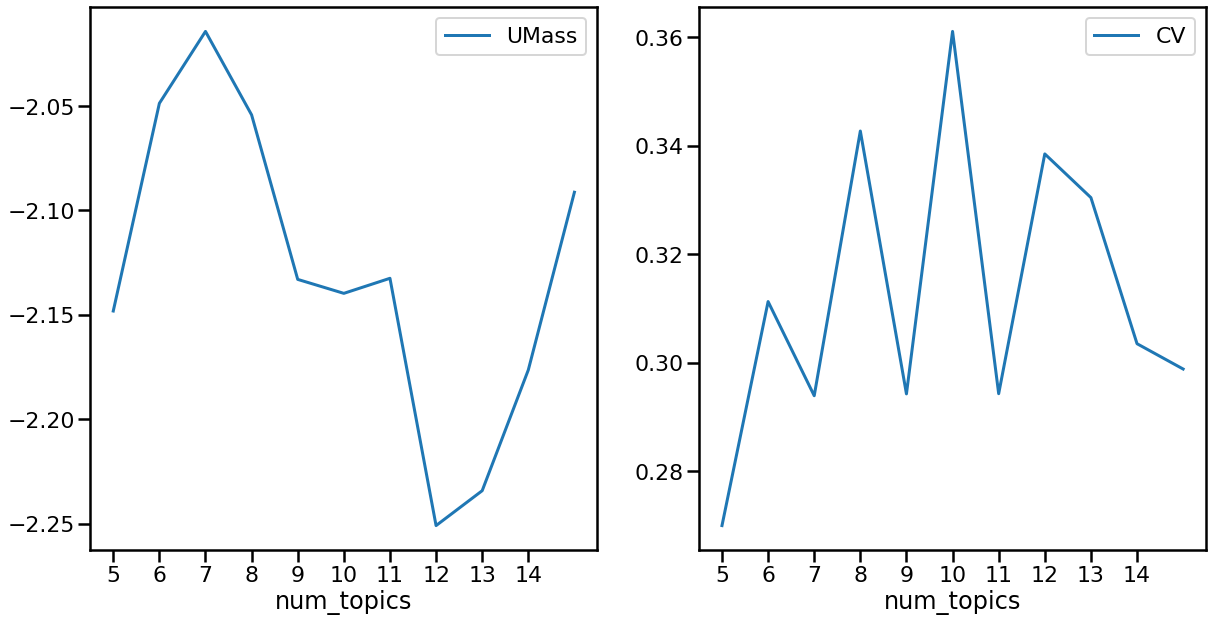

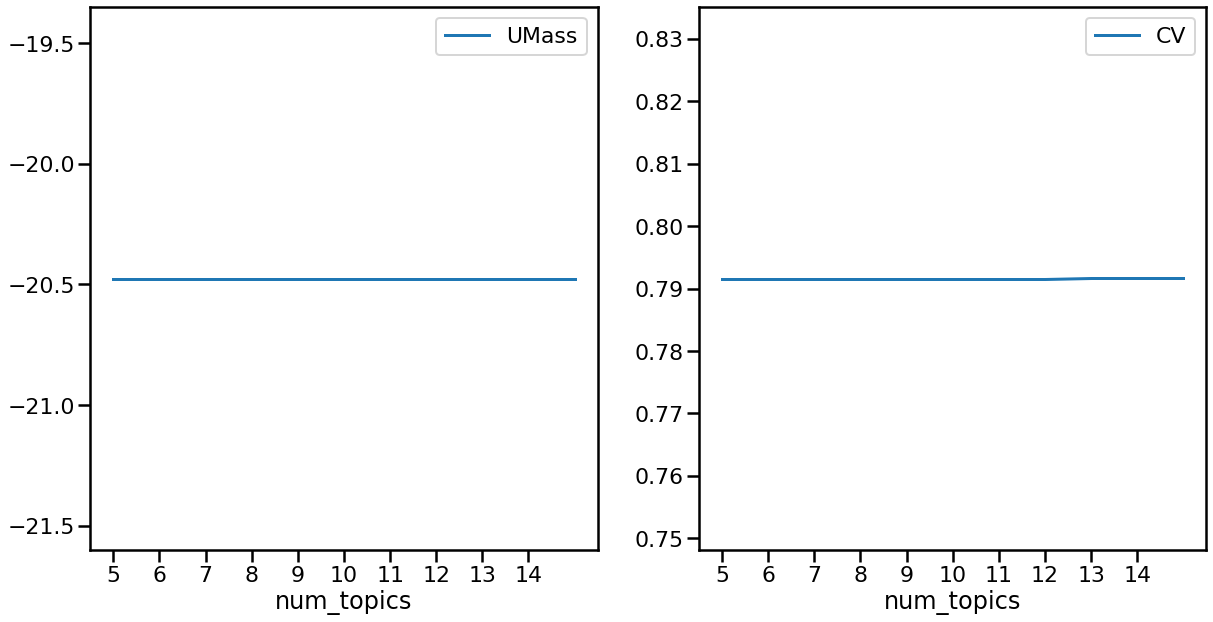

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('poster') # use large font


scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(5,15));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(5,15));
# the higher the better, but too much topics may being missleading

In [ ]:
num_topics = 6

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.5
                    )
    
print("done in {}".format(time.time()-start), flush=True)


In [ ]:
#data = {'topic_term_dists': , 
#        'doc_topic_dists': ,
#        'doc_lengths': ,
#        'vocab': vocab,
#        'term_frequency': }

In [ ]:
import pyLDAvis
movies_vis_data = pyLDAvis.prepare(**movies_model_data)

In [ ]:
pyLDAvis.display(movies_vis_data)

In [ ]:
# transform the data into topic distros
topic_corpus = model[model_corpus]

topic_corpus[0] # probabilities associated to topics

[(0, 0.18597575),
 (1, 0.2502212),
 (2, 0.119564936),
 (3, 0.07438368),
 (4, 0.27537775),
 (5, 0.09447671)]

[(0, 0.22939116),
 (1, 0.12326162),
 (2, 0.0740417),
 (3, 0.20717323),
 (4, 0.22075592),
 (5, 0.1453764)]

In [ ]:
model.print_topics()

[(0,
  '0.021*"have" + 0.017*"its" + 0.016*"rich" + 0.016*"give" + 0.016*"drink" + 0.015*"age" + 0.015*"structure" + 0.014*"acidity" + 0.014*"character" + 0.014*"ripe"'),
 (1,
  '0.020*"offer" + 0.018*"open" + 0.014*"black" + 0.014*"spice" + 0.014*"leather" + 0.014*"note" + 0.014*"aroma" + 0.013*"deliver" + 0.013*"cherry" + 0.012*"herb"'),
 (2,
  '0.019*"feel" + 0.015*"plum" + 0.014*"herbal" + 0.013*"berry" + 0.013*"bit" + 0.012*"aroma" + 0.011*"red" + 0.011*"raspberry" + 0.010*"slightly" + 0.010*"nose"'),
 (3,
  '0.023*"blackberry" + 0.020*"not" + 0.016*"sweet" + 0.015*"good" + 0.012*"now" + 0.011*"big" + 0.010*"very" + 0.010*"do" + 0.010*"jammy" + 0.010*"show"'),
 (4,
  '0.022*"oak" + 0.015*"vanilla" + 0.012*"coffee" + 0.011*"smoke" + 0.011*"cherry" + 0.011*"new" + 0.011*"barrel" + 0.010*"mix" + 0.010*"silky" + 0.010*"meat"'),
 (5,
  '0.020*"apple" + 0.020*"citrus" + 0.017*"peach" + 0.016*"clean" + 0.016*"crisp" + 0.016*"pear" + 0.015*"white" + 0.014*"lemon" + 0.014*"fresh" + 0.013*"

INFO:gensim.models.ldamodel:topic #0 (0.500): 0.021*"black" + 0.018*"cherry" + 0.017*"spice" + 0.017*"pepper" + 0.015*"open" + 0.015*"tobacco" + 0.014*"leather" + 0.014*"aroma" + 0.013*"offer" + 0.013*"herb"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.021*"have" + 0.021*"drink" + 0.019*"now" + 0.019*"ripe" + 0.018*"rich" + 0.017*"acidity" + 0.017*"fruity" + 0.016*"soft" + 0.016*"that" + 0.016*"its"
INFO:gensim.models.ldamodel:topic #2 (0.500): 0.022*"apple" + 0.021*"citrus" + 0.019*"white" + 0.018*"peach" + 0.017*"clean" + 0.017*"pear" + 0.015*"lemon" + 0.015*"fresh" + 0.013*"lime" + 0.013*"orange"
INFO:gensim.models.ldamodel:topic #3 (0.500): 0.018*"sweet" + 0.012*"bodied" + 0.012*"simple" + 0.012*"easy" + 0.011*"vanilla" + 0.011*"cola" + 0.011*"cherry" + 0.010*"raspberry" + 0.010*"medium" + 0.010*"pretty"
INFO:gensim.models.ldamodel:topic #4 (0.500): 0.023*"year" + 0.019*"blackberry" + 0.019*"chocolate" + 0.017*"age" + 0.016*"dark" + 0.014*"big" + 0.014*"tannin" + 0.013*"structur

[(0,
  '0.021*"black" + 0.018*"cherry" + 0.017*"spice" + 0.017*"pepper" + 0.015*"open" + 0.015*"tobacco" + 0.014*"leather" + 0.014*"aroma" + 0.013*"offer" + 0.013*"herb"'),
 (1,
  '0.021*"have" + 0.021*"drink" + 0.019*"now" + 0.019*"ripe" + 0.018*"rich" + 0.017*"acidity" + 0.017*"fruity" + 0.016*"soft" + 0.016*"that" + 0.016*"its"'),
 (2,
  '0.022*"apple" + 0.021*"citrus" + 0.019*"white" + 0.018*"peach" + 0.017*"clean" + 0.017*"pear" + 0.015*"lemon" + 0.015*"fresh" + 0.013*"lime" + 0.013*"orange"'),
 (3,
  '0.018*"sweet" + 0.012*"bodied" + 0.012*"simple" + 0.012*"easy" + 0.011*"vanilla" + 0.011*"cola" + 0.011*"cherry" + 0.010*"raspberry" + 0.010*"medium" + 0.010*"pretty"'),
 (4,
  '0.023*"year" + 0.019*"blackberry" + 0.019*"chocolate" + 0.017*"age" + 0.016*"dark" + 0.014*"big" + 0.014*"tannin" + 0.013*"structure" + 0.013*"well" + 0.012*"show"'),
 (5,
  '0.019*"not" + 0.018*"feel" + 0.014*"oak" + 0.014*"bit" + 0.014*"herbal" + 0.013*"taste" + 0.013*"do" + 0.012*"little" + 0.010*"good" +

In [ ]:
import re

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=10)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:10]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

# some of them might be stop words

1 "have", "its", "rich", "give", "drink", "age", "structure", "acidity", "character", "ripe"
2 "offer", "open", "black", "spice", "leather", "note", "aroma", "deliver", "cherry", "herb"
3 "feel", "plum", "herbal", "berry", "bit", "aroma", "red", "raspberry", "slightly", "nose"
4 "blackberry", "not", "sweet", "good", "now", "big", "very", "do", "jammy", "show"
5 "oak", "vanilla", "coffee", "smoke", "cherry", "new", "barrel", "mix", "silky", "meat"
6 "apple", "citrus", "peach", "clean", "crisp", "pear", "white", "lemon", "fresh", "pineapple"


INFO:gensim.models.ldamodel:topic #0 (0.500): 0.021*"black" + 0.018*"cherry" + 0.017*"spice" + 0.017*"pepper" + 0.015*"open" + 0.015*"tobacco" + 0.014*"leather" + 0.014*"aroma" + 0.013*"offer" + 0.013*"herb"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.021*"have" + 0.021*"drink" + 0.019*"now" + 0.019*"ripe" + 0.018*"rich" + 0.017*"acidity" + 0.017*"fruity" + 0.016*"soft" + 0.016*"that" + 0.016*"its"
INFO:gensim.models.ldamodel:topic #2 (0.500): 0.022*"apple" + 0.021*"citrus" + 0.019*"white" + 0.018*"peach" + 0.017*"clean" + 0.017*"pear" + 0.015*"lemon" + 0.015*"fresh" + 0.013*"lime" + 0.013*"orange"
INFO:gensim.models.ldamodel:topic #3 (0.500): 0.018*"sweet" + 0.012*"bodied" + 0.012*"simple" + 0.012*"easy" + 0.011*"vanilla" + 0.011*"cola" + 0.011*"cherry" + 0.010*"raspberry" + 0.010*"medium" + 0.010*"pretty"
INFO:gensim.models.ldamodel:topic #4 (0.500): 0.023*"year" + 0.019*"blackberry" + 0.019*"chocolate" + 0.017*"age" + 0.016*"dark" + 0.014*"big" + 0.014*"tannin" + 0.013*"structur

1 "black", "cherry", "spice", "pepper", "open", "tobacco", "leather", "aroma", "offer", "herb"
2 "have", "drink", "now", "ripe", "rich", "acidity", "fruity", "soft", "that", "its"
3 "apple", "citrus", "white", "peach", "clean", "pear", "lemon", "fresh", "lime", "orange"
4 "sweet", "bodied", "simple", "easy", "vanilla", "cola", "cherry", "raspberry", "medium", "pretty"
5 "year", "blackberry", "chocolate", "age", "dark", "big", "tannin", "structure", "well", "show"
6 "not", "feel", "oak", "bit", "herbal", "taste", "do", "little", "good", "berry"


In [ ]:
descriptors # a possible idea to "summarize" the topics is consider first 2 descriptors

['have, its',
 'offer, open',
 'feel, plum',
 'blackberry, not',
 'oak, vanilla',
 'apple, citrus']

['black, cherry',
 'have, drink',
 'apple, citrus',
 'sweet, bodied',
 'year, blackberry',
 'not, feel']

## Aggregating topics by a dependent variable

In [ ]:
target_category = 'country'
limit = 1000
# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(limit)]
# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)
# add the review category of each document (so we can aggregate)
topic_distros['category'] = df[target_category][:limit]

In [ ]:
topic_distros.head()

,"have, its","offer, open","feel, plum","blackberry, not","oak, vanilla","apple, citrus",category
0,0.185883,0.250186,0.119539,0.074406,0.275512,0.094473,US
1,0.182738,0.158945,0.181528,0.182234,0.222533,0.072021,Spain
2,0.092597,0.137423,0.077956,0.084306,0.224982,0.382736,US
3,0.090332,0.173969,0.071823,0.103159,0.487183,0.073534,US
4,0.543351,0.067552,0.067691,0.181313,0.072558,0.067535,France


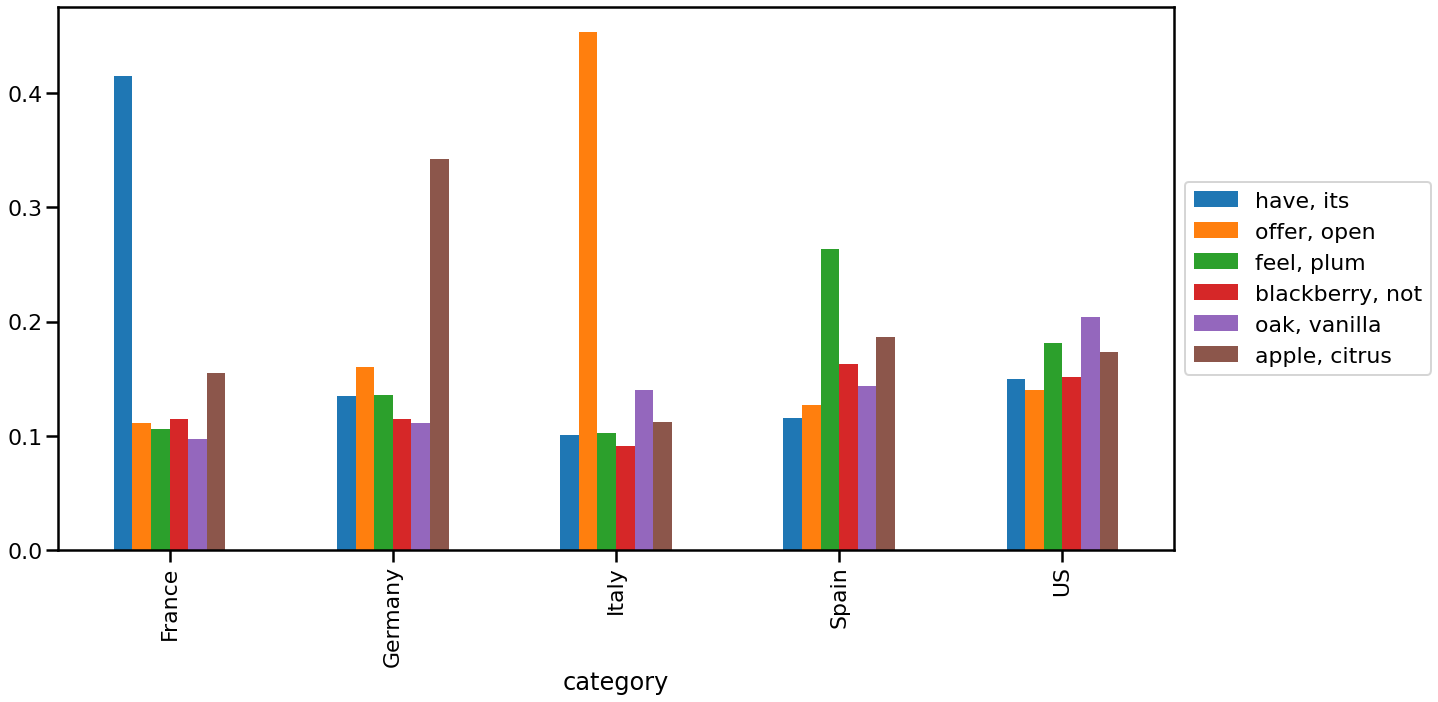

In [ ]:
import matplotlib.pyplot as plt # make graphs
import seaborn # make prettier graphs

seaborn.set_context('poster') # use large font

fig, ax = plt.subplots(figsize=(20, 10)) # set graph size
# aggregate topics by categories
aggregate_by_category = topic_distros[topic_distros.category.isin('Germany US Italy France Spain'.split())]
aggregate_by_category = aggregate_by_category.groupby(aggregate_by_category.category).mean()
# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax);
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [ ]:
topic_distros["predicted_topic"] = topic_distros[topic_distros.columns[:-1]].idxmax(axis=1)
topic_distros.head()

,"have, its","offer, open","feel, plum","blackberry, not","oak, vanilla","apple, citrus",category,predicted_topic
0,0.185883,0.250186,0.119539,0.074406,0.275512,0.094473,US,"oak, vanilla"
1,0.182738,0.158945,0.181528,0.182234,0.222533,0.072021,Spain,"oak, vanilla"
2,0.092597,0.137423,0.077956,0.084306,0.224982,0.382736,US,"apple, citrus"
3,0.090332,0.173969,0.071823,0.103159,0.487183,0.073534,US,"oak, vanilla"
4,0.543351,0.067552,0.067691,0.181313,0.072558,0.067535,France,"have, its"


In [ ]:
topic_distros[topic_distros["predicted_topic"] == 'apple, citrus']

,"have, its","offer, open","feel, plum","blackberry, not","oak, vanilla","apple, citrus",category,predicted_topic
2,0.092597,0.137423,0.077956,0.084306,0.224982,0.382736,US,"apple, citrus"
15,0.164580,0.105374,0.081500,0.205281,0.211518,0.231748,US,"apple, citrus"
23,0.093533,0.200566,0.077365,0.119335,0.218916,0.290285,US,"apple, citrus"
31,0.168182,0.077799,0.132518,0.185104,0.173161,0.263236,US,"apple, citrus"
34,0.251226,0.102398,0.139631,0.089384,0.089567,0.327793,US,"apple, citrus"
...,...,...,...,...,...,...,...,...
992,0.083889,0.080640,0.192016,0.158416,0.080387,0.404652,Israel,"apple, citrus"
993,0.136321,0.089341,0.087170,0.097400,0.081590,0.508178,Portugal,"apple, citrus"
994,0.208181,0.081954,0.114897,0.093463,0.078700,0.422804,Portugal,"apple, citrus"
995,0.235009,0.086208,0.090418,0.165803,0.084390,0.338171,Portugal,"apple, citrus"


# Author Topic Model

In [ ]:
from gensim.models import AuthorTopicModel
from gensim.test.utils import datapath, temporary_file

In [ ]:
from collections import defaultdict
author2doc = defaultdict(list)

for i, country in enumerate(df.country[:limit]):
    author2doc[country].append(i)
    
len(author2doc)

22

22

In [ ]:
author2doc

defaultdict(list,
            {'Argentina': [60,
              62,
              111,
              115,
              184,
              190,
              269,
              326,
              455,
              460,
              467,
              469,
              662,
              722,
              723,
              737,
              739,
              742,
              746,
              900,
              999],
             'Australia': [61, 631, 660, 825, 987],
             'Austria': [582, 587, 588, 595],
             'Bulgaria': [30, 692, 748, 852],
             'Canada': [394, 517, 705, 714, 851],
             'Chile': [155,
              159,
              171,
              179,
              502,
              537,
              760,
              764,
              766,
              770,
              778,
              833,
              873,
              892,
              936,
              938,
              943,
              948],
             'Croatia': [

defaultdict(list,
            {'Argentina': [60,
              62,
              111,
              115,
              184,
              190,
              269,
              326,
              455,
              460,
              467,
              469,
              662,
              722,
              723,
              737,
              739,
              742,
              746,
              900,
              999],
             'Australia': [61, 631, 660, 825, 987],
             'Austria': [582, 587, 588, 595],
             'Bulgaria': [30, 692, 748, 852],
             'Canada': [394, 517, 705, 714, 851],
             'Chile': [155,
              159,
              171,
              179,
              502,
              537,
              760,
              764,
              766,
              770,
              778,
              833,
              873,
              892,
              936,
              938,
              943,
              948],
             'Croatia': [

In [ ]:
coherence_values = []
author_model_list = []

dev_size = 5000
eval_size = 1000

dev_author2doc = {key: [idx for idx in value if idx < dev_size] for key, value in author2doc.items()}

for num_topics in range(5, 16):
    author_model = AuthorTopicModel(corpus=list(model_corpus[:dev_size]), 
                                    author2doc=dev_author2doc, 
                                    id2word=dictionary, 
                                    num_topics=num_topics)
#     author_model_list.append(author_model)
    
    coherencemodel_umass = CoherenceModel(model=author_model, 
                                          texts=instances[dev_size:dev_size+eval_size], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=author_model, 
                                       texts=instances[dev_size:dev_size+eval_size], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

5 -20.475674206963628 0.7916148505365839
6 -20.475674206963628 0.7916148505365839
7 -20.475674206963628 0.7916148505365838
8 -20.475674206963628 0.7916148505365839
9 -20.475674206963628 0.7916148505365839
10 -20.475674206963625 0.791614850536584
11 -20.475674206963625 0.791614850536584
12 -20.475674206963625 0.791614850536584
13 -20.475674206963625 0.7916148505365841
14 -20.475674206963625 0.7916148505365841
15 -20.475674206963625 0.7916148505365841


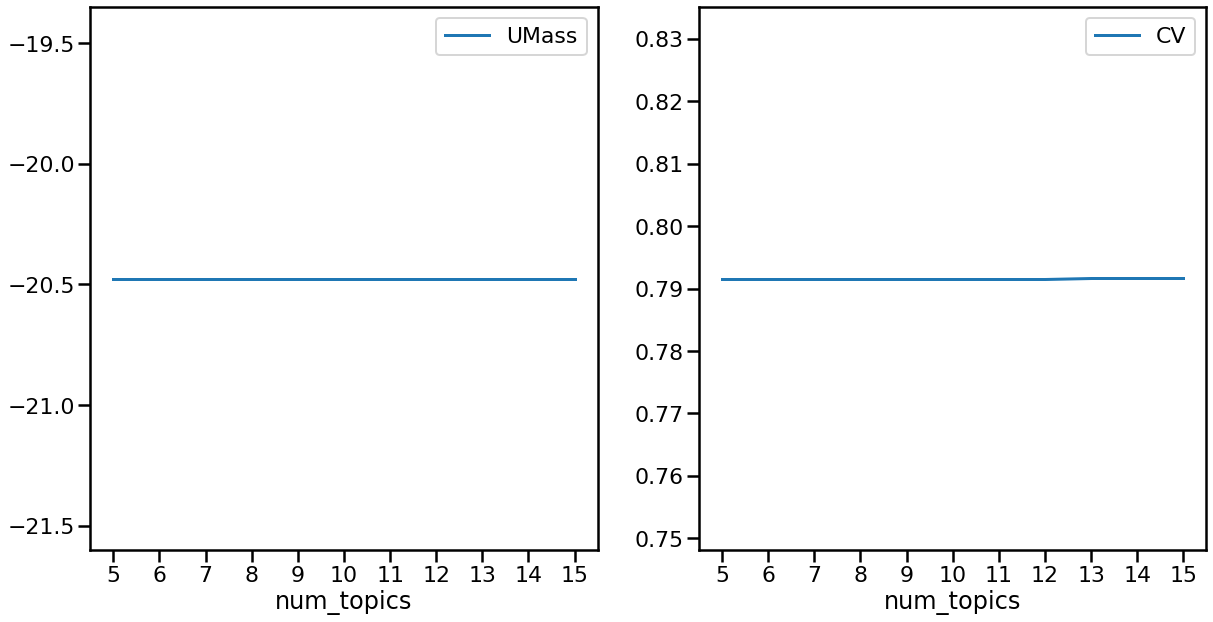

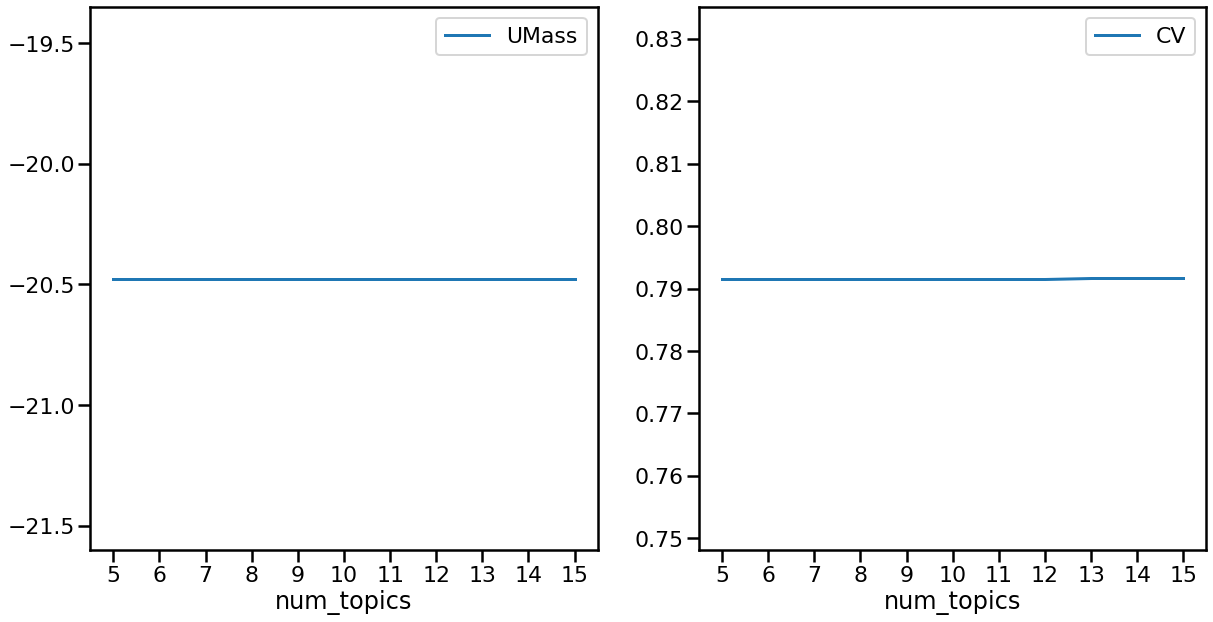

In [ ]:
%matplotlib inline
scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(5,16));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(5,16));

In [ ]:
n_topics_author = 8


author_model = AuthorTopicModel(corpus=list(model_corpus), 
                                author2doc=author2doc, 
                                id2word=dictionary, 
                                num_topics=n_topics_author,
                                passes=num_passes,
                                chunksize=chunk_size,
                                alpha=0.5
)


INFO:gensim.models.atmodel:Vocabulary consists of 1124 words.
INFO:gensim.models.ldamodel:using symmetric eta at 0.125
INFO:gensim.models.atmodel:running online author-topic training, 8 topics, 22 authors, 10 passes over the supplied corpus of 1000 documents, updating model once every 999 documents, evaluating perplexity every 1000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.atmodel:PROGRESS: pass 0, at document #999/1000
INFO:gensim.models.ldamodel:merging changes from 999 documents into a model of 1000 documents
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.001*"stainless" + 0.001*"same" + 0.001*"zesty" + 0.001*"yet" + 0.001*"iron" + 0.001*"grippy" + 0.001*"steel" + 0.001*"pungent" + 0.001*"shin" + 0.001*"moderate"
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.001*"stainless" + 0.001*"same" + 0.001*"zesty" + 0.001*"yet" + 0.001*"iron" + 0.001*"grippy" + 0.001*"steel" + 0.001*"pungent" + 0.001*"shin" + 0.001*"moderate"
INFO:gensim.models.ld

In [ ]:
# extract a list of tuples with topic number and descriptors from the model
author_model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                author_model.print_topics(num_topics=n_topics_author, num_words=5)]

author_descriptors = []
for i, m in sorted(author_model_topics):
    print(i+1, ", ".join(m[:5]))
    author_descriptors.append(", ".join(m[:2]).replace('"', ''))

1 "iron", "yet", "grippy", "stainless", "zesty"
2 "iron", "yet", "grippy", "stainless", "zesty"
3 "iron", "yet", "grippy", "stainless", "zesty"
4 "iron", "yet", "grippy", "stainless", "zesty"
5 "iron", "yet", "grippy", "stainless", "zesty"
6 "iron", "yet", "grippy", "stainless", "zesty"
7 "iron", "yet", "grippy", "stainless", "zesty"
8 "iron", "yet", "grippy", "stainless", "zesty"


INFO:gensim.models.ldamodel:topic #0 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*"zesty"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*"zesty"
INFO:gensim.models.ldamodel:topic #2 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*"zesty"
INFO:gensim.models.ldamodel:topic #3 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*"zesty"
INFO:gensim.models.ldamodel:topic #4 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*"zesty"
INFO:gensim.models.ldamodel:topic #5 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*"zesty"
INFO:gensim.models.ldamodel:topic #6 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*"zesty"
INFO:gensim.models.ldamodel:topic #7 (0.500): 0.001*"iron" + 0.001*"yet" + 0.001*"grippy" + 0.001*"stainless" + 0.001*

1 "iron", "yet", "grippy", "stainless", "zesty"
2 "iron", "yet", "grippy", "stainless", "zesty"
3 "iron", "yet", "grippy", "stainless", "zesty"
4 "iron", "yet", "grippy", "stainless", "zesty"
5 "iron", "yet", "grippy", "stainless", "zesty"
6 "iron", "yet", "grippy", "stainless", "zesty"
7 "iron", "yet", "grippy", "stainless", "zesty"
8 "iron", "yet", "grippy", "stainless", "zesty"


In [ ]:
author_vecs = {author: {author_descriptors[t]: 0.0
                         for t in range(author_model.num_topics)}
              for author in author_model.id2author.values()
              }
for author in author_model.id2author.values():
    for (t, v) in author_model.get_author_topics(author):
        author_vecs[author][author_descriptors[t]] = v

for country in 'Germany US Italy France Spain'.split():
    print(country, author_vecs[country])        

Germany {'iron, yet': 0.125}
US {'iron, yet': 0.125}
Italy {'iron, yet': 0.125}
France {'iron, yet': 0.125}
Spain {'iron, yet': 0.125}
Germany {'iron, yet': 0.125}
US {'iron, yet': 0.125}
Italy {'iron, yet': 0.125}
France {'iron, yet': 0.125}
Spain {'iron, yet': 0.125}


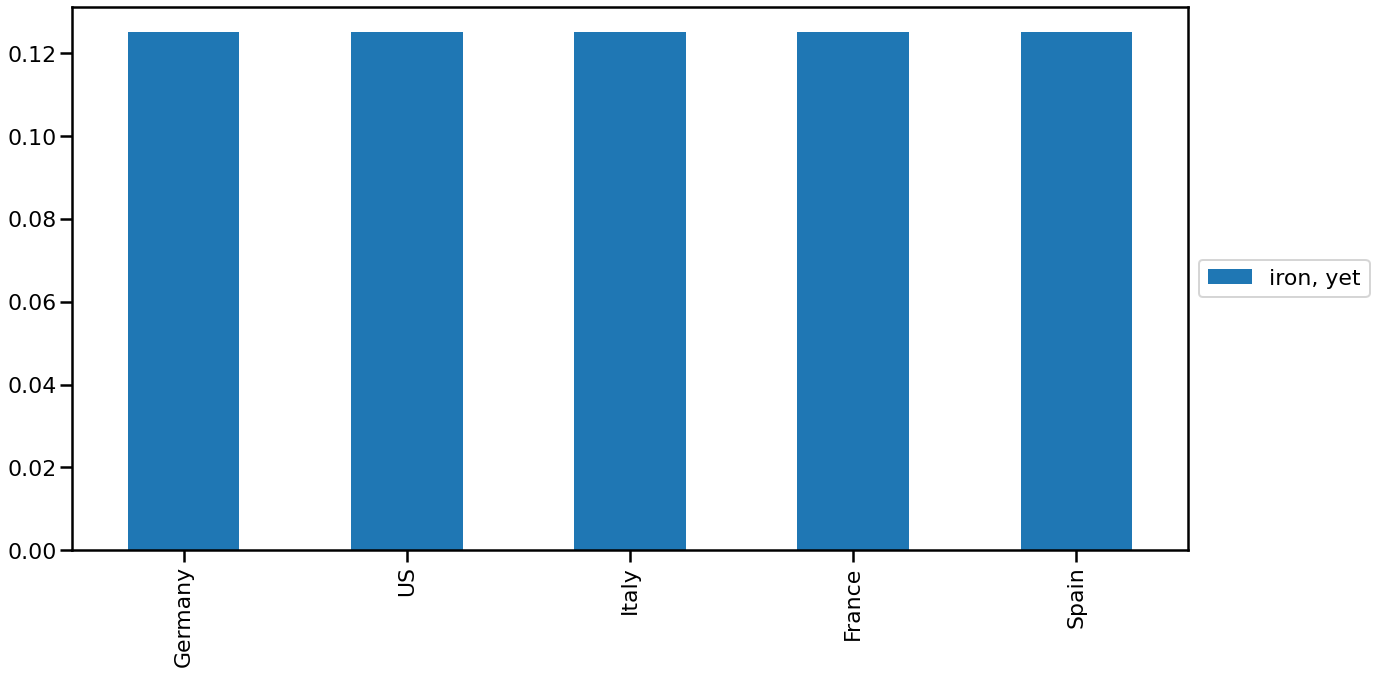

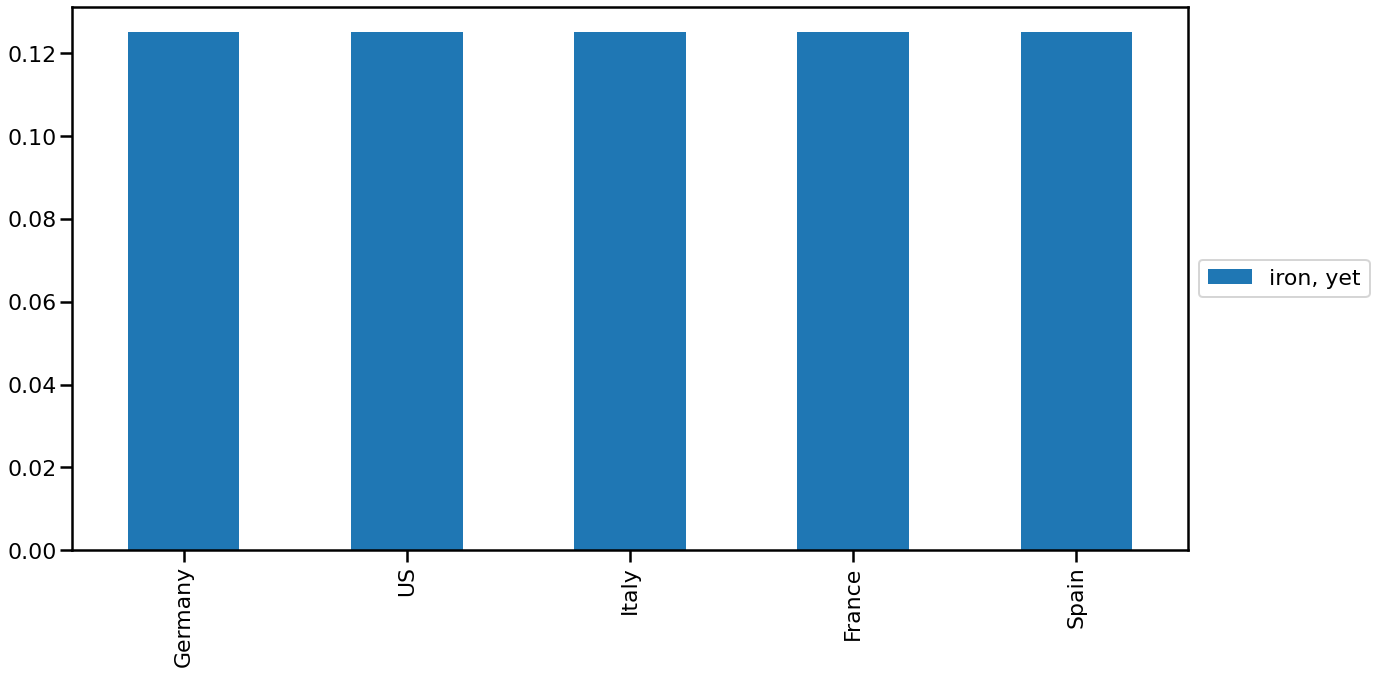

In [ ]:
author_df = pd.DataFrame.from_dict(author_vecs)
fig, ax = plt.subplots(figsize=(20,10))
author_df['Germany US Italy France Spain'.split()].T.plot.bar(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));


# Guided LDA

In [ ]:
!pip install git+https://github.com/CatalinVoss/GuidedLDA

  Cloning https://github.com/CatalinVoss/GuidedLDA to /tmp/pip-req-build-g6z28jqq
  Running command git clone -q https://github.com/CatalinVoss/GuidedLDA /tmp/pip-req-build-g6z28jqq
  Created wheel for guidedlda: filename=guidedlda-2.0.0.dev27-cp37-cp37m-linux_x86_64.whl size=2492594 sha256=0a4e207206f9f9b1df67778e4fc76237ec499829a3d1bcacbc21a39208b3bd0e
  Stored in directory: /tmp/pip-ephem-wheel-cache-5o1l9cix/wheels/a4/d5/1c/a4bf220c10fc39992c8af75ee87dc0cdd2c332bf6923b4c5eb
Successfully built guidedlda
  Cloning https://github.com/CatalinVoss/GuidedLDA to /tmp/pip-req-build-fky8jl47
  Running command git clone -q https://github.com/CatalinVoss/GuidedLDA /tmp/pip-req-build-fky8jl47
  Created wheel for guidedlda: filename=guidedlda-2.0.0.dev27-cp37-cp37m-linux_x86_64.whl size=2492615 sha256=7f60a04a42e7feb5586801ac1ba563d828b8c0983f8735fe3f205e2dbe2a4f92
  Stored in directory: /tmp/pip-ephem-wheel-cache-z8x8r1t9/wheels/a4/d5/1c/a4bf220c10fc39992c8af75ee87dc0cdd2c332bf6923b4c5eb
Succe

In [ ]:
import numpy as np
import guidedlda
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorize input
vectorizer = CountVectorizer(analyzer='word', 
                             ngram_range=(1,2), 
                             min_df=100, 
                             max_df=0.3, 
                             stop_words='english')

X = vectorizer.fit_transform(df.description_cleaned[:limit].tolist())

# store lookup structures for convenience
vocab = vectorizer.get_feature_names()
word2id = dict((v, idx) for idx, v in enumerate(vocab))

print(X.shape)

(1000, 24)
(1000, 24)


In [ ]:
# define topic seeds based on intuition
indicators = {
    'BRIGHT': ["fruity", "crisp", "bright"],
    'SPICE': ["licorice", "pepper", 'spice'], 
    'GREEN FRUIT': ["apple", "lemon", "citrus", "peach", "pear"],
    'DARK': ["vanilla", "smoke", "leather"],
    'RED FRUIT': ["strawberry", "raspberry", 'cherries'],
    'FOOD': ["pair", "food", "steak"],
    'FULL': ["bodied", "smoke", "medium", "vanilla"],
    'AGEING': ["age", "year", "structure"]
}

topic_names, seed_topic_list = zip(*indicators.items())
# filter out all words not actually in vocab
seed_topic_list = [[w for w in words if w in set(vocab)] for words in seed_topic_list]
    
# create a mapping {word_id: k}, which we need for the model
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id
        
print(seed_topic_list)

[[], ['pepper', 'spice'], ['apple'], [], [], [], ['bodied'], []]
[[], ['pepper', 'spice'], ['apple'], [], [], [], ['bodied'], []]


In [ ]:
# define model
model = guidedlda.GuidedLDA(n_topics=len(seed_topic_list), 
                            n_iter=1000, 
                            random_state=7, 
                            refresh=50, 
                            alpha=0.5, 
                            eta=0.000001)

# fit the model with seeds
doc_topic = model.fit_transform(X, seed_topics=seed_topics, seed_confidence=10)

# retrieve the word descriptors
n_top_words = 5
topic_word = model.topic_word_
descriptors_guided = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: "{}"'.format(topic_names[i], '" "'.join(topic_words)))
    descriptors_guided.append(' '.join(topic_words[:2]))

# as we can see the loglikelihood is converging and at the end we have
# lists of words more related to our topics

INFO:guidedlda:n_documents: 1000
INFO:guidedlda:vocab_size: 24
INFO:guidedlda:n_words: 4149
INFO:guidedlda:n_topics: 8
INFO:guidedlda:n_iter: 1000
INFO:guidedlda:<0> log likelihood: -23970
INFO:guidedlda:<50> log likelihood: -16348
INFO:guidedlda:<100> log likelihood: -15903
INFO:guidedlda:<150> log likelihood: -15872
INFO:guidedlda:<200> log likelihood: -15775
INFO:guidedlda:<250> log likelihood: -15796
INFO:guidedlda:<300> log likelihood: -15950
INFO:guidedlda:<350> log likelihood: -15764
INFO:guidedlda:<400> log likelihood: -15713
INFO:guidedlda:<450> log likelihood: -15695
INFO:guidedlda:<500> log likelihood: -15397
INFO:guidedlda:<550> log likelihood: -15484
INFO:guidedlda:<600> log likelihood: -15478
INFO:guidedlda:<650> log likelihood: -15327
INFO:guidedlda:<700> log likelihood: -15353
INFO:guidedlda:<750> log likelihood: -15430
INFO:guidedlda:<800> log likelihood: -15246
INFO:guidedlda:<850> log likelihood: -15257
INFO:guidedlda:<900> log likelihood: -15235
INFO:guidedlda:<950>

Topic BRIGHT: "blend" "make" "nose" "acidity" "finish"
Topic SPICE: "spice" "black" "pepper" "nose" "black cherry"
Topic GREEN FRUIT: "apple" "ripe" "texture" "rich" "acidity"
Topic DARK: "finish" "plum" "note" "offer" "dry"
Topic RED FRUIT: "berry" "red" "note" "finish" "offer"
Topic FOOD: "fresh" "acidity" "dry" "rich" "ripe"
Topic FULL: "oak" "finish" "bodied" "blackberry" "texture"
Topic AGEING: "black" "dark" "ripe" "black cherry" "dry"


INFO:guidedlda:n_documents: 1000
INFO:guidedlda:vocab_size: 24
INFO:guidedlda:n_words: 4149
INFO:guidedlda:n_topics: 8
INFO:guidedlda:n_iter: 1000
INFO:guidedlda:<0> log likelihood: -23970
INFO:guidedlda:<50> log likelihood: -16348
INFO:guidedlda:<100> log likelihood: -15903
INFO:guidedlda:<150> log likelihood: -15872
INFO:guidedlda:<200> log likelihood: -15775
INFO:guidedlda:<250> log likelihood: -15796
INFO:guidedlda:<300> log likelihood: -15950
INFO:guidedlda:<350> log likelihood: -15764
INFO:guidedlda:<400> log likelihood: -15713
INFO:guidedlda:<450> log likelihood: -15695
INFO:guidedlda:<500> log likelihood: -15397
INFO:guidedlda:<550> log likelihood: -15484
INFO:guidedlda:<600> log likelihood: -15478
INFO:guidedlda:<650> log likelihood: -15327
INFO:guidedlda:<700> log likelihood: -15353
INFO:guidedlda:<750> log likelihood: -15430
INFO:guidedlda:<800> log likelihood: -15246
INFO:guidedlda:<850> log likelihood: -15257
INFO:guidedlda:<900> log likelihood: -15235
INFO:guidedlda:<950>

Topic BRIGHT: "blend" "make" "nose" "acidity" "finish"
Topic SPICE: "spice" "black" "pepper" "nose" "black cherry"
Topic GREEN FRUIT: "apple" "ripe" "texture" "rich" "acidity"
Topic DARK: "finish" "plum" "note" "offer" "dry"
Topic RED FRUIT: "berry" "red" "note" "finish" "offer"
Topic FOOD: "fresh" "acidity" "dry" "rich" "ripe"
Topic FULL: "oak" "finish" "bodied" "blackberry" "texture"
Topic AGEING: "black" "dark" "ripe" "black cherry" "dry"


In [ ]:
target_category = 'country'
# get a list of all the topic scores for each document
# scores = [[t[1] for t in topic_corpus[entry]] for entry in range(limit)]
# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros_guided = pd.DataFrame(data=model.doc_topic_, columns=descriptors_guided)
# add the review category of each document (so we can aggregate)
topic_distros_guided['category'] = df[target_category][:limit]

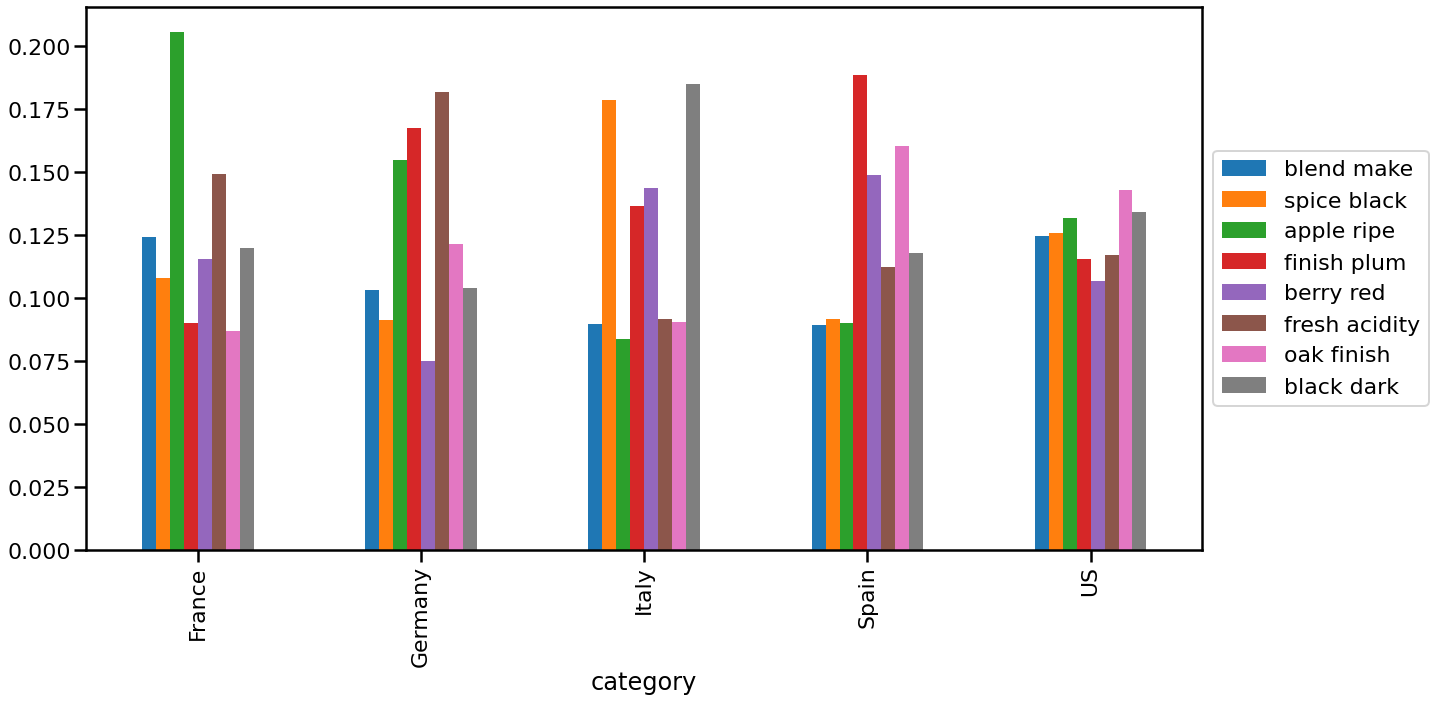

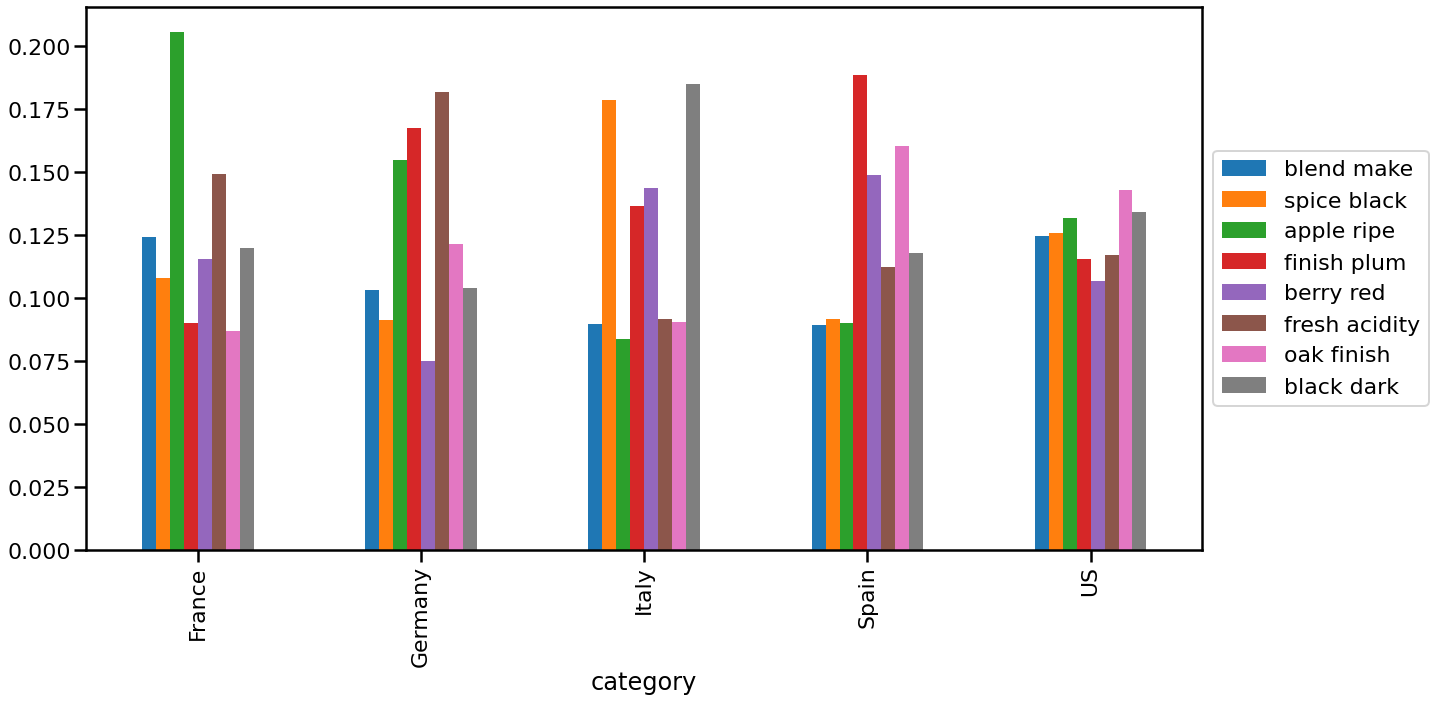

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) # set graph size
# aggregate topics by review categories
aggregate_by_category = topic_distros_guided[topic_distros_guided.category.isin('Germany US Italy France Spain'.split())]
aggregate_by_category = aggregate_by_category.groupby(aggregate_by_category.category).mean()

# plot the graph
aggregate_by_category[descriptors_guided].plot.bar(ax=ax);
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));